Creacion del grafo dada la lista de coordenadas

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1]
 [1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1]
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1

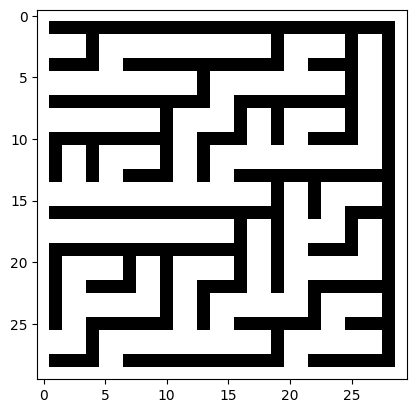

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

np.seed = 6

def carve_maze(grid, size):
  output_grid = np.ones([size*3, size*3],dtype=int)
  i = 0
  j = 0
  while i < size:
    w = i*3 + 1
    while j < size:
      k = j*3 + 1
      toss = grid[i,j]
      output_grid[w,k] = 0
      if toss == 0 and k+2 < size*3:
        output_grid[w,k+1] = 0
        output_grid[w,k+2] = 0
      if toss == 1 and w-2 >=0:
        output_grid[w-1,k] = 0
        output_grid[w-2,k] = 0
      j = j + 1
    i = i + 1
    j = 0
  return output_grid

# Final test

# Try with small test
n = 1
p = 0.3
size = 10
grid = np.random.binomial(n,p, size=(size,size))

first_row = grid[0]
first_row[first_row == 1] = 0
grid[0] = first_row
for i in range(1,size):
  grid[i,size-1] = 1

maze = carve_maze(grid, size)
print(maze)



plt.imshow(maze, cmap='gray')


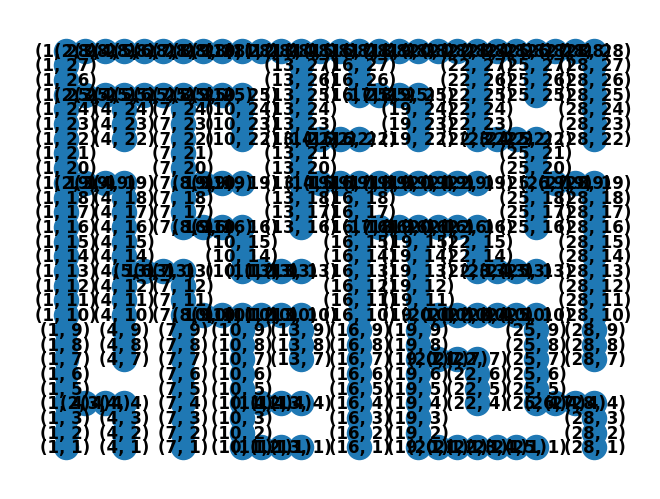

In [7]:
def maze_to_node(maze):
    G = nx.Graph()
    rows, cols = maze.shape
    for i in range(rows):
        for j in range(cols):
            if maze[i,j] == 0:
                G.add_node((i,j))
                if i-1 >= 0 and maze[i-1,j] == 0:
                    G.add_edge((i,j),(i-1,j))
                if i+1 < rows and maze[i+1,j] == 0:
                    G.add_edge((i,j),(i+1,j))
                if j-1 >= 0 and maze[i,j-1] == 0:
                    G.add_edge((i,j),(i,j-1))
                if j+1 < cols and maze[i,j+1] == 0:
                    G.add_edge((i,j),(i,j+1))
    return G

def draw_graph(G):
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    plt.show()

G = maze_to_node(maze)
draw_graph(G)

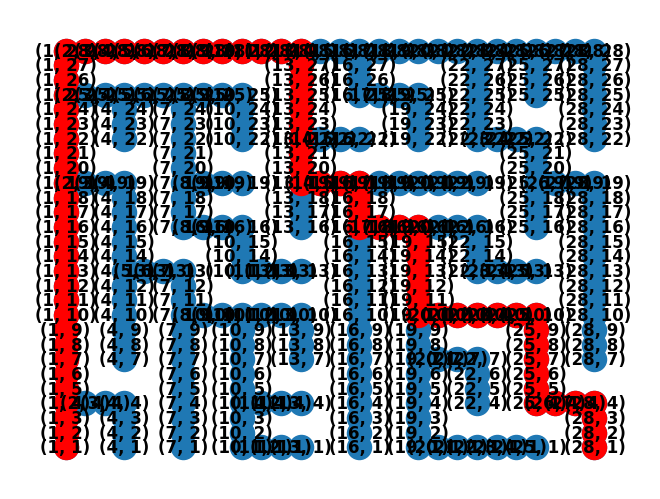

In [13]:
def dfs_with_graph(G, start, end):
    stack = [(start, [start])]
    visited = set()

    while stack:
        (node, path) = stack.pop()
        if node not in visited:
            if node == end:
                return path
            visited.add(node)
            for neighbor in G.neighbors(node):
                stack.append((neighbor, path + [neighbor]))

    return None

def draw_path(G, path):
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')
    plt.show()

# Cambiar a conveniencia
start = (1,1)
end = (28, 1)


path = dfs_with_graph(G, start, end)
draw_path(G, path)

